# Turbine Library Interface

FLORIS allows users to use a series of pre-defined turbines, as well as the ability to bring in an
external library of turbines to supplement the pre-defined turbines. This reference guide will
demonstrate how to load, compare, and interact with the basic turbine properties prior to any wake
modeling.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from floris.turbine_library import TurbineInterface, TurbineLibrary

## Interacting With A Single Turbine

Here we will show how to load a single turbine and display its core properities.

### Load the turbine

There are a few different ways that a ``TurbineInterface`` object can be created, demonstrated
below, but for the sake of convenience we'll only consider the object created from the
internal library.

- Option 1: Load from a ``floris.Turbine`` object `ti = TurbineInterface(turbine_obj)`
- Option 2: Load from a turbine configuration dictionary
  `ti = TurbineInterface.from_turbine_dict(turbine_dict)`
- Option 3: Load a file from the internal turbine library
  `ti = TurbineInterface.from_internal_library("iea_15MW.yaml")`
- Option 4: Load a file from anywhere: `ti = TurbineInterface.from_yaml("path/to/turbine.yaml")`


In [2]:
# Option 3
ti = TurbineInterface.from_internal_library("iea_15MW.yaml")

### Plot the core attributes

For `TurbineInterface`, the core functionality is the power and thrust computation and plotting,
demonstrated below.

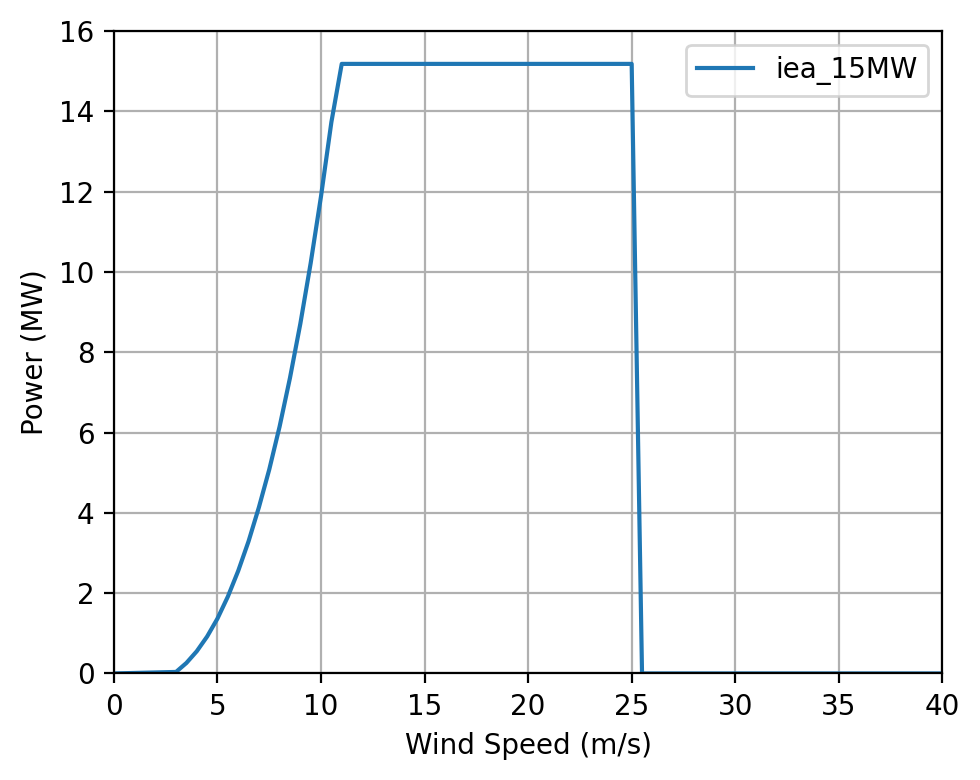

In [3]:
ti.plot_power_curve()

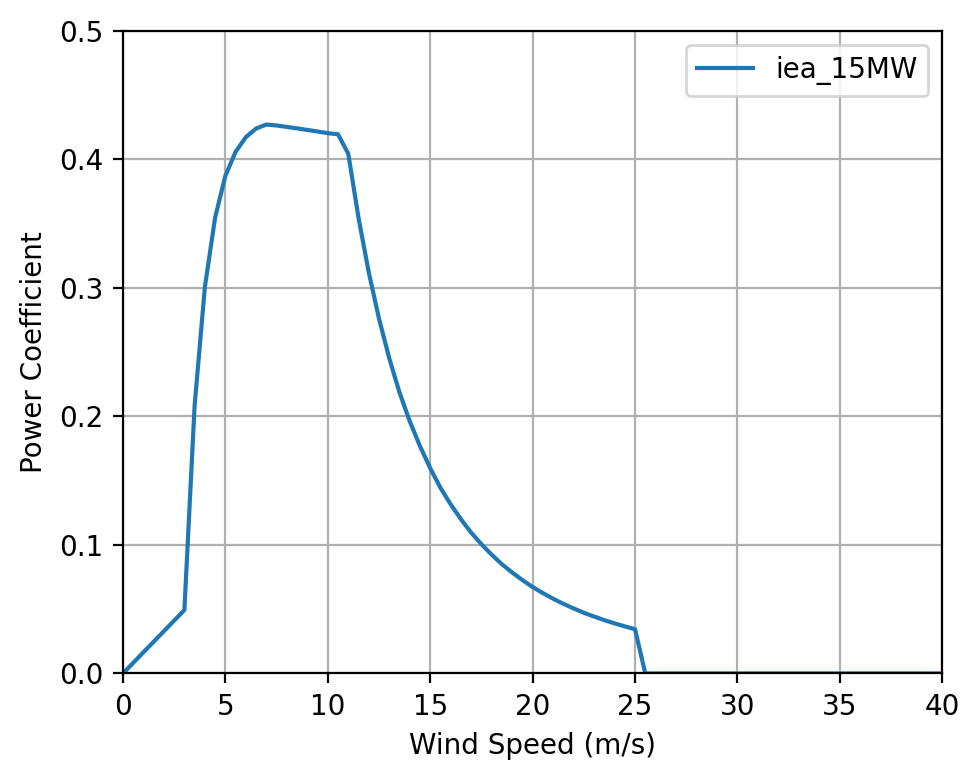

In [4]:
ti.plot_Cp_curve()

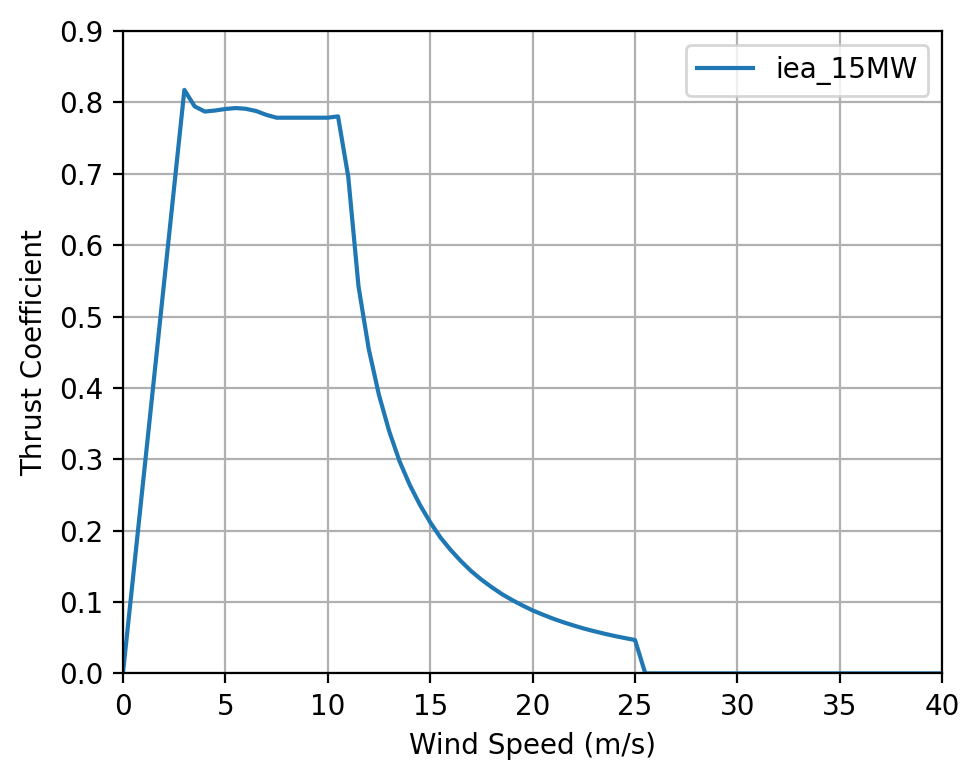

In [5]:
ti.plot_Ct_curve()

## Compare multiple turbines

The other class provided by the turbine library is the `TurbineLibrary` object, which allows users
to simultaneously load in internal and external turbine library configurations, and compare them.

It should be noted that there are a few differences in the loading compared to the `floris.Farm`
class. Primarily, when you load a turbine with a missing reference air density, 1.225 is
automatically used, and you can overlapping names in the internal and external turbine libraries, so
a little more care is required.

### Loading the libraries

Loading a turbine library is either a 2 or more step process depending on how many turbine libraries
are going to be compared.

In [6]:
# Initialize the turbine library (no definitions required!)
tl = TurbineLibrary()

# Load the internal library, except the 20 MW turbine
tl.load_internal_library(exclude=["x_20MW.yaml"])
print([*tl.turbine_map])

['iea_15MW', 'iea_10MW', 'nrel_5MW']


In addition to the `load_internal_library` method, there is a `load_external_library` method with
the same parameterizations, but with an argument for a new library file path.

We can also override previously ignored or loaded files by rerunning the load method again. Notice
how we use `which=["x_20MW.yaml"]` to now include the file. This makes it so we only load the one
turbine configuration, however, the same could be achieved by specifying none of the keyword
arguments.

In [7]:
tl.load_internal_library(which=["x_20MW.yaml"])
print([*tl.turbine_map])

['iea_15MW', 'iea_10MW', 'nrel_5MW', 'x_20MW']


Notice that the "x_20MW" turbine is now loaded.

### Comparing turbines

There are a number of methods that will plot the varying properties for each turbine against each
other, but here the primary output will be displayed.

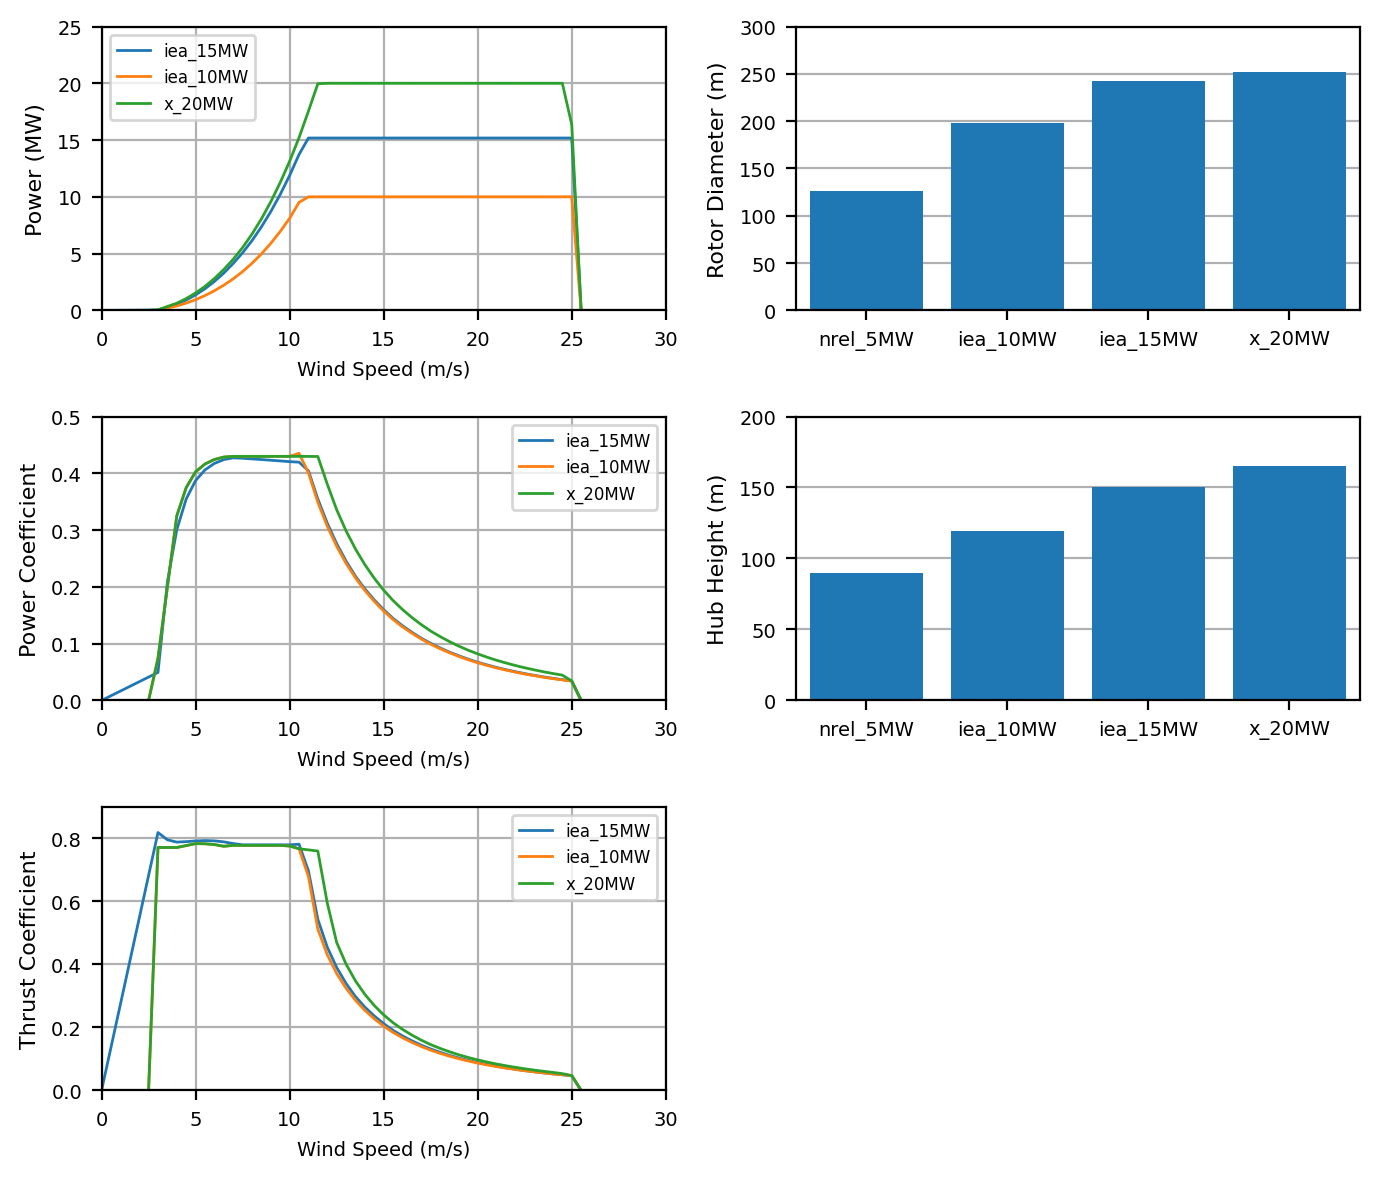

In [8]:
tl.plot_comparison(
    exclude=["nrel_5MW"],  # Remove a turbine just for demonstration
    wind_speeds=np.linspace(0, 30, 61),  # 0 -> 30 m/s, every 0.5 m/s
    fig_kwargs={"figsize": (7, 6)},  # Size the figure appropriately for the docs page
    plot_kwargs={"linewidth": 1},  # Ensure the line plots look nice
)

Alternatively, these can all be plot individually with (book reading order):

- `plot_power_curves()`
- `plot_rotor_diameters()`
- `plot_Cp_curves()`
- `plot_hub_heights()`
- `plot_Ct_curves()`

For a text based approach, we can access the attributes like the following:

In [9]:
header = f"{'Turbine':>15} | Rotor Diameter (m) | Hub Height (m) | Air Density (ρ)"
print(header)
print("-" * len(header))
for name, t in tl.turbine_map.items():
    print(f"{name:>15}", end=" | ")
    print(f"{t.turbine.rotor_diameter:>18,.2f}", end=" | ")
    print(f"{t.turbine.hub_height:>14,.1f}", end=" | ")
    print(f"{t.turbine.ref_density_cp_ct:>15,.3f}")

        Turbine | Rotor Diameter (m) | Hub Height (m) | Air Density (ρ)
-----------------------------------------------------------------------
       iea_15MW |             242.24 |          150.0 |           1.225
       iea_10MW |             198.00 |          119.0 |           1.225
       nrel_5MW |             126.00 |           90.0 |           1.225
         x_20MW |             252.00 |          165.0 |           1.225
